In [2]:
import sys
sys.path.append("..")
from preprocess.src.label_features import atr, position_price_by_atr, buy_calc_force_entry_price, sell_calc_force_entry_price, position_force_entry_price, position_label

In [3]:
import os
import pandas as pd
sample_data = os.path.join("../data/preprocess/cpcv_fold/Bitcoin/fold_0/senario_0/test/2.parquet.gzip")
assert os.path.exists(sample_data)

sample_df = pd.read_parquet(sample_data, engine="pyarrow")
sample_df.head()

,Open,High,Low,Close,Volume,sma20,target
timestamp,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1


In [4]:
sample_df["atr"] = atr(sample_df)
sample_df.head(20)

,Open,High,Low,Close,Volume,sma20,target,atr
timestamp,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN


In [5]:
sample_df["buy_price"] = position_price_by_atr(sample_df, position="buy")
sample_df.head(20)

,Open,High,Low,Close,Volume,sma20,target,atr,buy_price
timestamp,,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN,4109.406667
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN,4109.876667
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN,4110.376667
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN,4110.316667
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN,4108.298333
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN,4106.108333
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN,4105.810000
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN,4103.568571
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN,4104.831429


In [6]:
sample_df["sell_price"] = position_price_by_atr(sample_df, position="sell")
sample_df.head(20)

,Open,High,Low,Close,Volume,sma20,target,atr,buy_price,sell_price
timestamp,,,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN,4109.406667,4111.406667
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN,4109.876667,4111.876667
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN,4110.376667,4112.376667
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN,4110.316667,4112.316667
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN,4108.298333,4110.298333
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN,4106.108333,4108.108333
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN,4105.810000,4107.810000
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN,4103.568571,4105.568571
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN,4104.831429,4106.831429


In [7]:
sample_df["buy_fep"], sample_df["buy_fet"] = buy_calc_force_entry_price(sample_df["buy_price"].values, sample_df["Low"].values, pips=1)
sample_df.head(40)

,Open,High,Low,Close,Volume,sma20,target,atr,buy_price,sell_price,buy_fep,buy_fet
timestamp,,,,,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN,4109.406667,4111.406667,4109.406667,1.0
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN,4109.876667,4111.876667,4109.876667,1.0
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN,4110.376667,4112.376667,4110.376667,1.0
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN,4110.316667,4112.316667,4110.316667,1.0
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN,4108.298333,4110.298333,4108.298333,1.0
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN,4106.108333,4108.108333,4106.108333,1.0
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN,4105.810000,4107.810000,4105.810000,1.0
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN,4103.568571,4105.568571,4103.568571,1.0
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN,4104.831429,4106.831429,4104.831429,1.0


In [8]:
sample_df["sell_fep"], sample_df["sell_fet"] = sell_calc_force_entry_price(sample_df["sell_price"].values, sample_df["High"].values, pips=1)
sample_df.head(20)

,Open,High,Low,Close,Volume,sma20,target,atr,buy_price,sell_price,buy_fep,buy_fet,sell_fep,sell_fet
timestamp,,,,,,,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN,4109.406667,4111.406667,4109.406667,1.0,4111.406667,1.0
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN,4109.876667,4111.876667,4109.876667,1.0,4111.876667,1.0
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN,4110.376667,4112.376667,4110.376667,1.0,4112.376667,1.0
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN,4110.316667,4112.316667,4110.316667,1.0,4112.316667,1.0
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN,4108.298333,4110.298333,4108.298333,1.0,4110.298333,1.0
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN,4106.108333,4108.108333,4106.108333,1.0,4108.108333,1.0
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN,4105.810000,4107.810000,4105.810000,1.0,4107.810000,1.0
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN,4103.568571,4105.568571,4103.568571,1.0,4105.568571,1.0
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN,4104.831429,4106.831429,4104.831429,1.0,4106.831429,1.0


In [9]:
df = pd.DataFrame()
df["buy_fep"], df["buy_fet"] = position_force_entry_price(sample_df, position="buy")
df.head(20)

,buy_fep,buy_fet
0,4109.406667,1.0
1,4109.876667,1.0
2,4110.376667,1.0
3,4110.316667,1.0
4,4108.298333,1.0
5,4106.108333,1.0
6,4105.810000,1.0
7,4103.568571,1.0
8,4104.831429,1.0
9,4105.570000,1.0


In [10]:
df = pd.DataFrame()
df["sell_fep"], df["sell_fet"] = position_force_entry_price(sample_df, position="sell")
df.head(20)

,sell_fep,sell_fet
0,4111.406667,1.0
1,4111.876667,1.0
2,4112.376667,1.0
3,4112.316667,1.0
4,4110.298333,1.0
5,4108.108333,1.0
6,4107.810000,1.0
7,4105.568571,1.0
8,4106.831429,1.0
9,4107.570000,1.0


In [13]:
import numba
import numpy as np

@numba.njit
def richman_calc_force_entry_price(entry_price=None, lo=None, pips=None):
    y = entry_price.copy()
    y[:] = np.nan
    force_entry_time = entry_price.copy()
    force_entry_time[:] = np.nan
    for i in range(entry_price.size):
        for j in range(i + 1, entry_price.size):
            if round(lo[j] / pips) < round(entry_price[j - 1] / pips):
                y[i] = entry_price[j - 1]
                force_entry_time[i] = j - i
                break
    return y, force_entry_time


sample_df["buy_fep"], sample_df["buy_fet"] = richman_calc_force_entry_price(sample_df["buy_price"].values, sample_df["Low"].values, pips=1)
sample_df.head(60)

,Open,High,Low,Close,Volume,sma20,target,atr,buy_price,sell_price,buy_fep,buy_fet,sell_fep,sell_fet
timestamp,,,,,,,,,,,,,,
1553904060,4109.431667,4180.100000,4087.40,4110.406667,74.016370,0.994353,1,NaN,4109.406667,4111.406667,4109.406667,1.0,4111.406667,1.0
1553904120,4110.416667,4180.019894,4089.90,4110.876667,110.968400,0.994119,1,NaN,4109.876667,4111.876667,4109.876667,1.0,4111.876667,1.0
1553904180,4111.065000,4178.700000,4091.20,4111.376667,38.727471,0.994181,1,NaN,4110.376667,4112.376667,4110.376667,1.0,4112.376667,1.0
1553904240,4111.326667,4180.700000,4091.40,4111.316667,77.287072,0.993942,1,NaN,4110.316667,4112.316667,4110.316667,1.0,4112.316667,1.0
1553904300,4110.959999,4179.479995,4088.67,4109.298333,78.069738,0.994335,1,NaN,4108.298333,4110.298333,4108.298333,1.0,4110.298333,1.0
1553904360,4109.301667,4179.100000,4086.00,4107.108333,78.499615,0.994559,1,NaN,4106.108333,4108.108333,4106.108333,1.0,4108.108333,1.0
1553904420,4106.853333,4177.233687,4085.30,4106.810000,64.962340,0.994755,1,NaN,4105.810000,4107.810000,4105.810000,1.0,4107.810000,1.0
1553904480,4104.010000,4176.400000,4085.20,4104.568571,65.138094,0.994715,1,NaN,4103.568571,4105.568571,4103.568571,1.0,4105.568571,1.0
1553904540,4105.004286,4176.400000,4086.00,4105.831429,63.648043,0.994535,1,NaN,4104.831429,4106.831429,4104.831429,1.0,4106.831429,1.0


/Users/akiranoda/projects/crypto_model/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/akiranoda/projects/crypto_model/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/akiranoda/projects/crypto_model/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/akiranoda/projects/crypto_model/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/akiranoda/projects/crypto_model/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_t

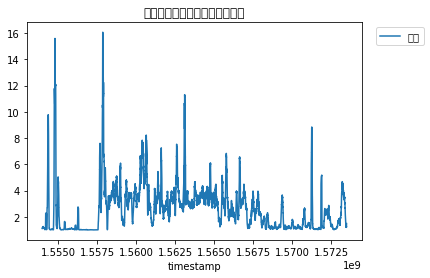

In [16]:
import matplotlib.pyplot as plt

# sample_df['buy_fet'].rolling(1000).mean().plot(label='買い')
sample_df['sell_fet'].rolling(1000).mean().plot(label='売り')
plt.title('エグジットまでの平均時間推移')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()